# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [28]:
# get all the red ball data
X_noise_all = pd.read_csv('../data-7-more-noise/red_ball_all.csv', decimal='.', delimiter=',') 
X_normal_all = pd.read_csv('../data-7cam-10/all/red_ball_all_int.csv', decimal='.', delimiter=',')

In [29]:
# get all the positions data
y_noise_all = pd.read_csv('../data-7-more-noise/positions_all.csv', decimal='.', delimiter=',')
y_normal_all = pd.read_csv('../data-7cam-10/all/positions_all_int.csv', decimal='.', delimiter=',')

In [30]:
(X_noise_all.shape, y_noise_all.shape), (X_normal_all.shape, y_normal_all.shape)

(((31940, 14), (31940, 3)), ((14305, 14), (14305, 3)))

#### 2.1 Check for Missing Values in spriral_down_b and spiral_down_c

I Interpolated the files with a lot of missing values
All the results are quite good.

### 2.3 Combine all the datasets

In [31]:
X_train = pd.concat([X_noise_all, X_normal_all])
y_train = pd.concat([y_noise_all, y_normal_all])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [32]:
X_train.isna().sum()

u0    0
v0    0
u1    0
v1    0
u2    0
v2    0
u3    0
v3    0
u4    0
v4    0
u5    0
v5    0
u6    0
v6    0
dtype: int64

In [33]:
X_train.shape, y_train.shape

((46245, 14), (46245, 3))

In [34]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [35]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,37.5,47.5,122.5,46.5,35.5,60.5,77.0,61.0,125.0,60.5,38.0,74.0,123.0,75.0,4.259194,3.934438,24.48138
1,28.0,54.5,112.0,54.5,26.0,68.0,69.0,68.0,113.5,68.0,28.0,81.5,111.0,82.0,4.182837,2.415704,23.06340
2,28.0,50.0,111.0,49.0,26.0,62.5,69.0,62.5,113.5,62.5,28.0,76.0,111.5,76.5,5.776577,3.475322,22.43998
3,27.5,46.0,110.5,44.5,26.0,59.0,68.0,59.5,113.0,59.0,27.5,72.5,110.0,72.5,5.805867,2.680643,22.23114
4,23.5,57.5,107.0,57.0,21.0,71.0,65.0,71.0,110.0,71.0,23.0,84.5,107.0,85.0,5.787980,2.140558,23.23835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46240,5.5,42.5,90.0,44.0,3.5,56.5,49.5,57.5,92.0,57.0,5.5,70.5,90.0,70.0,8.714492,1.476479,23.73885
46241,6.0,42.0,91.0,44.0,4.0,56.0,50.0,57.0,92.0,57.0,6.0,70.0,90.5,69.0,8.606370,1.427334,23.83823
46242,7.0,42.0,92.0,43.0,5.0,56.0,51.0,56.5,93.0,56.0,7.5,70.0,91.5,69.5,8.488082,1.386553,23.93695
46243,9.0,41.0,93.0,43.0,7.0,55.0,52.5,56.5,95.0,56.0,9.0,69.0,93.0,69.0,8.360427,1.354317,24.03475


In [36]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 0
The data has missing values: 0


In [37]:
X = combined.iloc[:, :14]
y = combined.iloc[:, 14:]
X.to_csv('../data-7-more-noise/red_ball_all.csv', index=False)
y.to_csv('../data-7-more-noise/positions_all.csv', index=False)

In [38]:
X.shape, y.shape

((46245, 14), (46245, 3))

In [39]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [40]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [41]:
# Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 28000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
model = MLPRegressor(random_state=42, max_iter=28000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [42]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [43]:
#model = random_search.best_estimator_

## 5. Training the Model

In [44]:
model.fit(X_scaled, y_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=28000,
             random_state=42)

## 6. Make Predictions On Test Data

In [45]:
import pandas as pd

In [46]:
X_test_8_a = pd.read_csv('../data-7cam-10/data-8motion/red_ball_coordinates_128px_2024-03-12_22h40m.csv', decimal='.', delimiter=',')
X_test_8_b = pd.read_csv('../data-7cam-10/data-8motion/red_ball_coordinates_128px_2024-03-12_22h41m.csv', decimal='.', delimiter=',')
X_test_8_c = pd.read_csv('../data-7-more-noise/red_ball_coordinates_128px_2024-03-19_12h56m.csv', decimal='.', delimiter=',')
X_test_8_d = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h24m.csv', decimal='.', delimiter=',')
X_test_8_e = pd.read_csv('../data-noise-7/red_ball_coordinates_128px_2024-03-19_11h32m.csv', decimal='.', delimiter=',')

In [47]:
y_test_8_a = pd.read_csv('../data-7cam-10/data-8motion/positions_xyz_2024-03-12_22h40m.csv', decimal='.', delimiter=',').iloc[4:]
y_test_8_b = pd.read_csv('../data-7cam-10/data-8motion/positions_xyz_2024-03-12_22h41m.csv', decimal='.', delimiter=',').iloc[4:]
y_test_8_c = pd.read_csv('../data-7-more-noise/positions_xyz_2024-03-19_12h56m.csv', decimal='.', delimiter=',').iloc[:-2]
y_test_8_d = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h24m.csv', decimal='.', delimiter=',').iloc[:-2]
y_test_8_e = pd.read_csv('../data-noise-7/positions_xyz_2024-03-19_11h32m.csv', decimal='.', delimiter=',').iloc[:-2]
(X_test_8_a.shape, y_test_8_a.shape), (X_test_8_b.shape, y_test_8_b.shape), (X_test_8_c.shape, y_test_8_c.shape), (X_test_8_d.shape, y_test_8_d.shape), (X_test_8_e.shape, y_test_8_e.shape)

(((1028, 14), (1028, 3)),
 ((1006, 14), (1006, 3)),
 ((508, 14), (508, 3)),
 ((544, 14), (544, 3)),
 ((538, 14), (538, 3)))

In [48]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :14]
    y_val = combined_test.iloc[:, 14:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [49]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 0.7371696376477059
Mean Absolute Error on Test Data Set: 0.6863560679011814
R2 Score on Test Data set: 0.08815173894834298


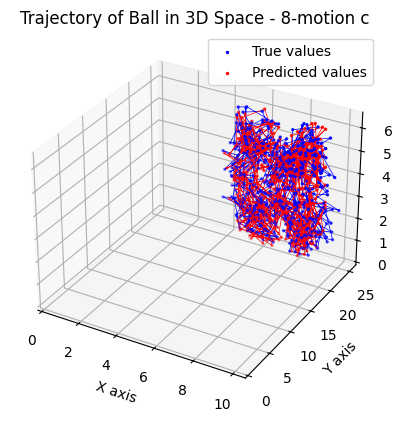

In [50]:
X_test_8_scaled_c, y_test_8_c = prepare_and_scale_test_data(X_test_8_c, y_test_8_c, scaler_x)
X_test_8_pred_c, mse_8_c, mae_8_c, r2_8_c = predict_evaluate_plot(X_test_8_scaled_c, y_test_8_c, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion c')

Mean Squared Error on Test Data Set: 0.16877529995410745
Mean Absolute Error on Test Data Set: 0.2772363446693212
R2 Score on Test Data set: 0.8435691080805752


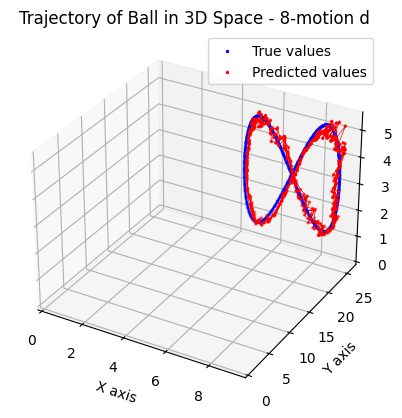

In [51]:
X_test_8_scaled_d, y_test_8_d = prepare_and_scale_test_data(X_test_8_d, y_test_8_d, scaler_x)
X_test_8_pred_d, mse_8_d, mae_8_d, r2_8_d = predict_evaluate_plot(X_test_8_scaled_d, y_test_8_d, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion d')

Mean Squared Error on Test Data Set: 0.1354440190802334
Mean Absolute Error on Test Data Set: 0.24980770763622626
R2 Score on Test Data set: 0.780007782881757


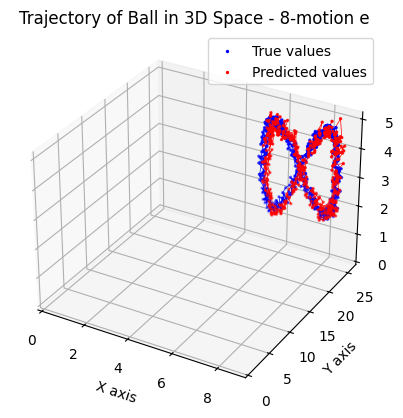

In [52]:
X_test_8_scaled_e, y_test_8_e = prepare_and_scale_test_data(X_test_8_e, y_test_8_e, scaler_x)
X_test_8_pred_e, mse_8_e, mae_8_e, r2_8_e = predict_evaluate_plot(X_test_8_scaled_e, y_test_8_e, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion e')

Mean Squared Error on Test Data Set: 0.21588203288252608
Mean Absolute Error on Test Data Set: 0.3300709817720893
R2 Score on Test Data set: 0.8543437966449378


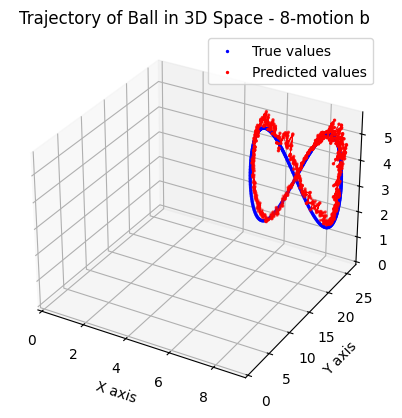

In [53]:
X_test_8_scaled_b, y_test_8_b = prepare_and_scale_test_data(X_test_8_b, y_test_8_b, scaler_x)
X_test_8_pred_b, mse_8_b, mae_8_b, r2_8_b = predict_evaluate_plot(X_test_8_scaled_b, y_test_8_b, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion b')